# Getting Started with PIVPy

This notebook shows an example of how one can use vecpy in order to load manipulate and display analyzed PIV data. 

### step 1 - import pivpy and dependencies

here we import the package code so that we can use it next 

In [ ]:
import os, sys 
# sys.path.append(os.path.abspath('../'))

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pivpy import io, pivpy, graphics

# for the sake of this tutorial, ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

### step 2 - load the tests data

In order to load the data, first we need to set up the path to the data directory. Following that we need to get a list of files names that we would like to view/analyze. Finally we very quickly load the data in to a list of vec instances.

In [ ]:
# pointer to the directory with the data
import pkg_resources as pkg
path_to_data  = pkg.resource_filename('pivpy','data')
# list the directory
# os.listdir(path_to_data)

In [ ]:
# let's read only the files from the Run* 
data = io.load_directory(os.path.join(path_to_data,'Insight')) # you can add also: basename='day2a*',ext='.vec')

found 5 files


In [ ]:
# let's check if it's read:
data.attrs['files']

['c:\\users\\alex\\repos\\pivpy\\pivpy\\data\\Insight\\Run000001.T000.D000.P000.H001.L.vec',
 'c:\\users\\alex\\repos\\pivpy\\pivpy\\data\\Insight\\Run000002.T000.D000.P000.H001.L.vec',
 'c:\\users\\alex\\repos\\pivpy\\pivpy\\data\\Insight\\Run000003.T000.D000.P000.H001.L.vec',
 'c:\\users\\alex\\repos\\pivpy\\pivpy\\data\\Insight\\Run000004.T000.D000.P000.H001.L.vec',
 'c:\\users\\alex\\repos\\pivpy\\pivpy\\data\\Insight\\Run000005.T000.D000.P000.H001.L.vec']

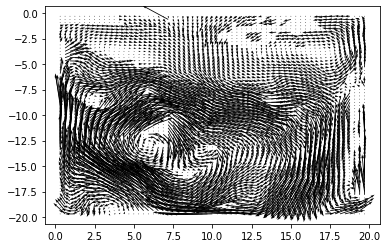

In [ ]:
plt.quiver(data.x, data.y, data.u.isel(t=0), data.v.isel(t=0),scale=1)

### step 3 - plot some arrows

first things first - show a quiver plot

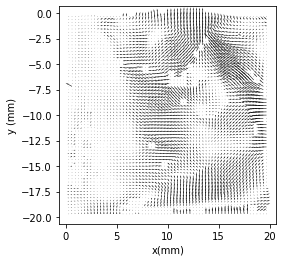

In [ ]:
fig, ax = graphics.quiver(data.isel(t=0), nthArr=2, arrScale=20)

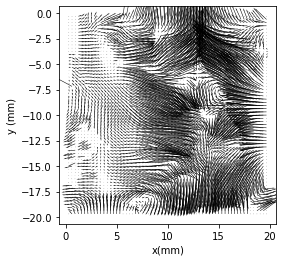

In [ ]:
fig, ax = graphics.quiver(data.isel(t=0), nthArr=3, arrScale=5)

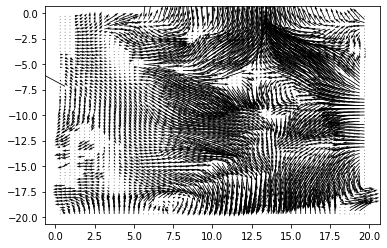

In [ ]:
tmp = data.isel(t=0)
plt.quiver(tmp.x,tmp.y,tmp.u.T,tmp.v.T,scale=1)

In [ ]:
# we can read also a single file only into a 1 frame dataset
d = io.load_vec(os.path.join(path_to_data,'Insight/Run000001.T000.D000.P000.H001.L.vec'))

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='x(mm)', ylabel='y (mm)'>)

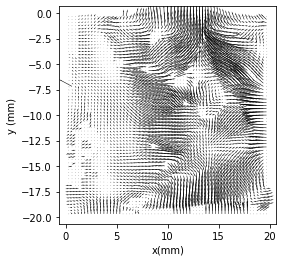

In [ ]:
graphics.quiver(d.isel(t=0),arrScale=10)

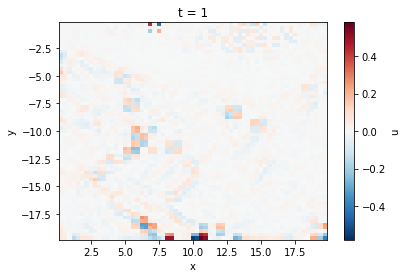

In [71]:
d.isel(t=0).differentiate(coord='x').differentiate(coord='y')['u'].plot.pcolormesh()

and a vorticity map

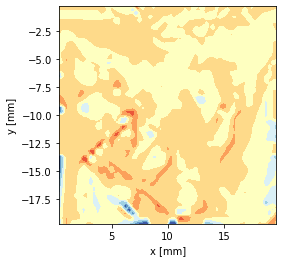

In [72]:
# prepare vorticity
d.piv.vec2scal(property='curl') # it will appear as d['w'] variable, 'w' for all scalar properties

# plot
fig, ax = graphics.contour_plot(d)

Also, velocity histograms in x and y directions

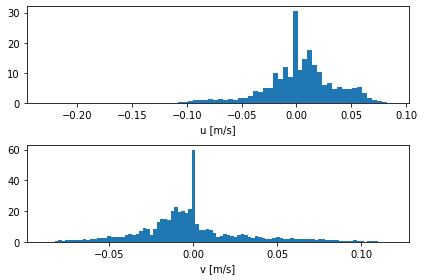

In [73]:
fig, ax = graphics.histogram(data, normed = True)

We can also plot a whole list of vec's as subplots:

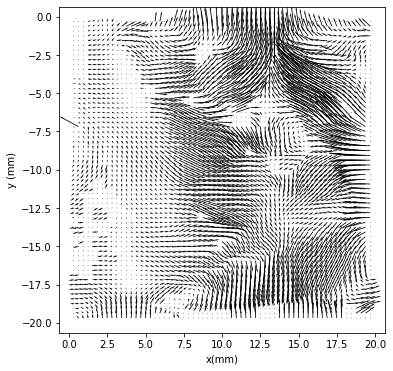

In [74]:
fig, ax = graphics.quiver(data.isel(t=0), nthArr=4, arrScale=10)
fig.set_size_inches(10, 6)

# Last but not least - manipulation

lets create a linear combinatino of our data and then see how to manipulate the coordinate system

__Addition and Scalar multiplication__

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='x(mm)', ylabel='y (mm)'>)

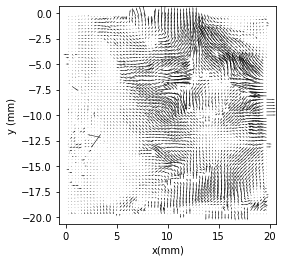

In [75]:
v = (data + 3*data - 2 * data.isel(t=0)) / 3.
graphics.quiver(v.isel(t=-1), arrScale=10,units=data.attrs['units'])

__Crop__

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='x(mm)', ylabel='y (mm)'>)

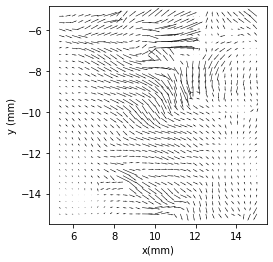

In [76]:
v = v.piv.crop([5,15,-5,-15])  #(xmin, xmax, ymin, ymax)
graphics.quiver(v.isel(t=-1), arrScale=10,units=data.attrs['units'])

__Rotate__

In [77]:
# v.piv.rotate(90) # not implemented

__Translation of Coordinate System__

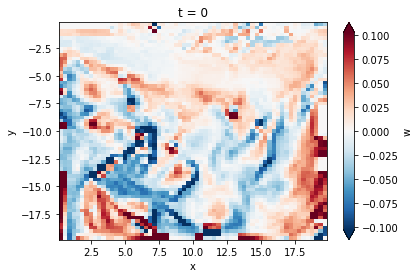

In [78]:
# we can also use some default plot from xarray
data.piv.vorticity()
data.isel(t=0)['w'].plot(robust=True)

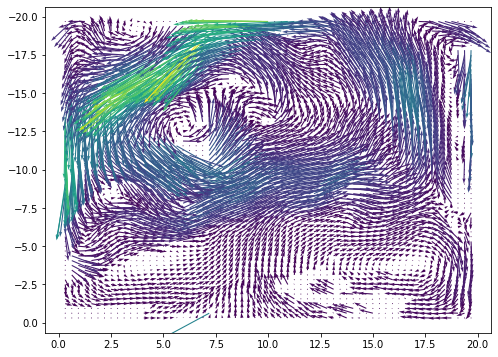

In [79]:
# low level quiver
plt.figure(figsize=(8,6))
plt.quiver(data.x,data.y,data.u[:,:,0], -data.v[:,:,0] ,data.u[:,:,0]**2 + data.v[:,:,0]**2,scale=.75)
plt.gca().invert_yaxis()

In [80]:
test = io.create_sample_field(rows=25,cols=5)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='x(pix)', ylabel='y (pix)'>)

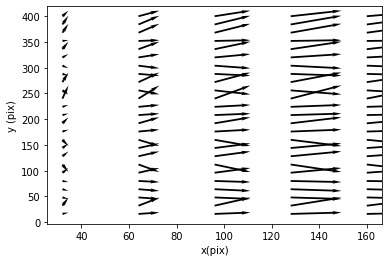

In [81]:
graphics.quiver(test,arrScale=5,aspectratio='auto')

In [82]:
data = io.load_vec(os.path.join(path_to_data,'openpiv/exp1_001_b.vec'))

In [83]:
variables,units,rows,cols, dt, frame = io.parse_header(os.path.join(path_to_data,'openpiv/exp1_001_b.vec'))
variables,units,rows,cols, dt, frame

(['x', 'y', 'u', 'v'], ['pix', 'pix', 'pix/dt', 'pix/dt'], None, None, None, 1)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='x(pix)', ylabel='y (pix)'>)

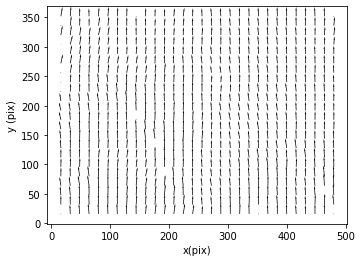

In [84]:
data.piv.quiver()

In [85]:
data = io.load_directory(os.path.join(path_to_data,'urban_canopy'),ext='.vc7')
# vc7 files are for some reason need transpose
data['u'] = data['u'].transpose()
data['v'] = data['v'].transpose()

found 5 files


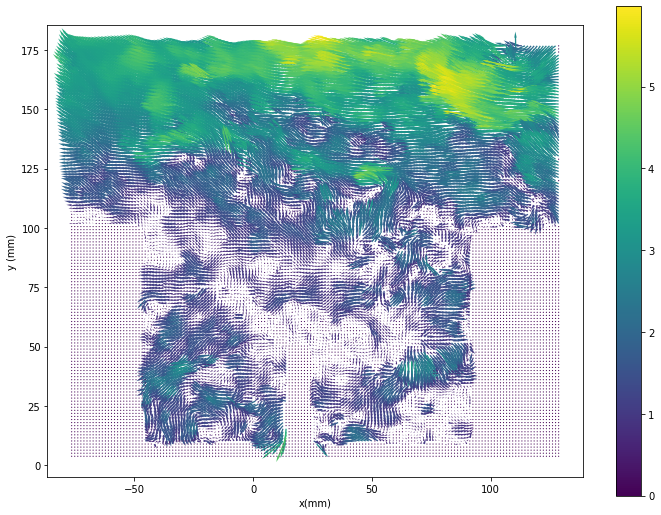

In [86]:
data.isel(t=0).piv.quiver(arrScale=15,colbar=True)
plt.gcf().set_size_inches(12,10)
#plt.gca().invert_yaxis()

In [87]:
try:
    import pyarrow
except:
    %pip install pyarrow

In [90]:
%time
df = data.to_dataframe()
df.to_parquet('tmp.pq')

CPU times: total: 0 ns
Wall time: 0 ns


In [103]:
df

u    v  chc
x           y          t               
-76.450150  176.755852 0  0.0 -0.0    0
                       1  0.0 -0.0    0
                       2  0.0 -0.0    0
                       3  0.0 -0.0    0
                       4  0.0 -0.0    0
...                       ...  ...  ...
 128.707173 3.855970   0  0.0 -0.0    0
                       1  0.0 -0.0    0
                       2  0.0 -0.0    0
                       3  0.0 -0.0    0
                       4  0.0 -0.0    0

[108000 rows x 3 columns]

In [110]:
data1 = xr.Dataset.from_dataframe(pd.read_parquet('tmp.pq'))

In [115]:
data1.piv.average.piv.quiver()

KeyError: 'units'

In [109]:
data

<xarray.Dataset>
Dimensions:  (x: 160, y: 135, t: 5)
Coordinates:
  * x        (x) float64 -76.45 -75.16 -73.87 -72.58 ... 124.8 126.1 127.4 128.7
  * y        (y) float64 176.8 175.5 174.2 172.9 ... 7.727 6.437 5.146 3.856
  * t        (t) int64 0 1 2 3 4
Data variables:
    u        (t, y, x) float64 0.0 -2.202 -2.478 -2.734 ... 0.0 0.0 0.0 0.0
    v        (t, y, x) float64 -0.0 2.969 2.565 2.244 ... -0.0 -0.0 -0.0 -0.0
    chc      (x, y, t) int8 0 0 0 0 0 5 5 5 5 5 5 5 ... 0 0 0 0 0 0 0 0 0 0 0 0
Attributes: (12/82)
    _DATE:                            18.05.19
    _TIME:                            01:02:00.456
    FrameScaleI0:                     0.268812\n0\nm/s\nvelocity
    FrameScaleZ0:                     1\n0\npixel\n
    FrameScaleY0:                     -0.0806436\n177.401\nmm\nposition
    FrameScaleX0:                     0.0806436\n-77.0953\nmm\nposition
    ...                               ...
    _SCALE_Y:                         -0.0806436 177.401\nmm\nposition\n
    _SCALE_X:                         0.0806436 -77.0953\nmm\nposition\n
    variables:                        ['x', 'y', 'u', 'v']
    units:                            ['mm', 'mm', 'm/s', 'm/s']
    dt:                               300
    files:                            c:\users\alex\repos\pivpy\pivpy\data\ur...

In [89]:
%time
data.to_netcdf('tmp.nc')

CPU times: total: 0 ns
Wall time: 0 ns


AttributeError: 'numpy.ndarray' object has no attribute 'values'